### Import Library

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Import dataset

In [2]:
# Reading the CSV file
df = pd.read_csv("DFSCO.csv")

# Printing top 5 rows
df.head()


,Date,Demand,Temperature (Celsius),Rainfall (mm),Day of Week,Holiday
0,1/1/2024,100,20,5,Monday,Yes
1,1/2/2024,110,22,3,Tuesday,No
2,1/3/2024,105,18,8,Wednesday,No
3,1/4/2024,120,19,2,Thursday,No
4,1/5/2024,115,21,4,Friday,No


### Data Cleaning

In [3]:
# Checking for missing values
df.isnull().sum()

# Displaying data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   20 non-null     object
 1   Demand                 20 non-null     int64 
 2   Temperature (Celsius)  20 non-null     int64 
 3   Rainfall (mm)          20 non-null     int64 
 4   Day of Week            20 non-null     object
 5   Holiday                20 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


Assumption: No missing values and duplicates to clean in this dummy dataset.

### Exploratory Data Analysis (EDA)

#### Distribution of demand

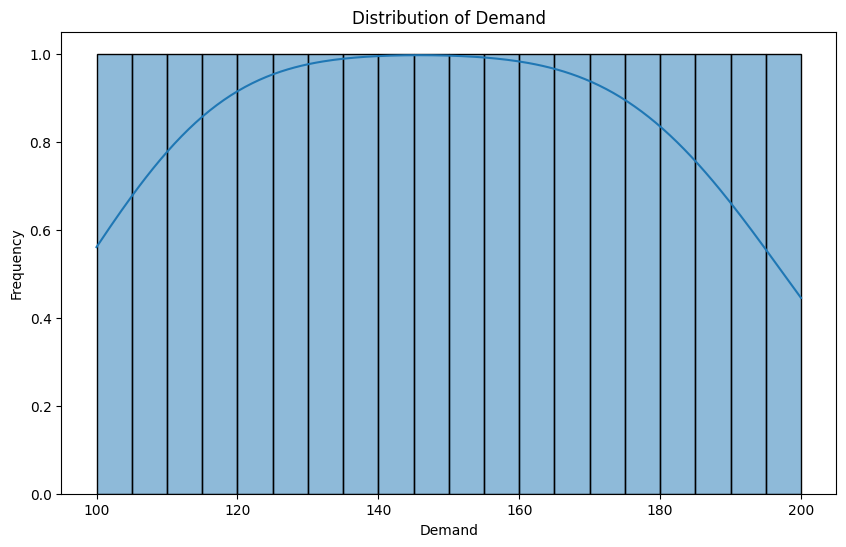

In [4]:
# Histogram and KDE plot for Demand
plt.figure(figsize=(10, 6))
sns.histplot(df['Demand'], kde=True, bins=20)
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()

#### Demand Over Time

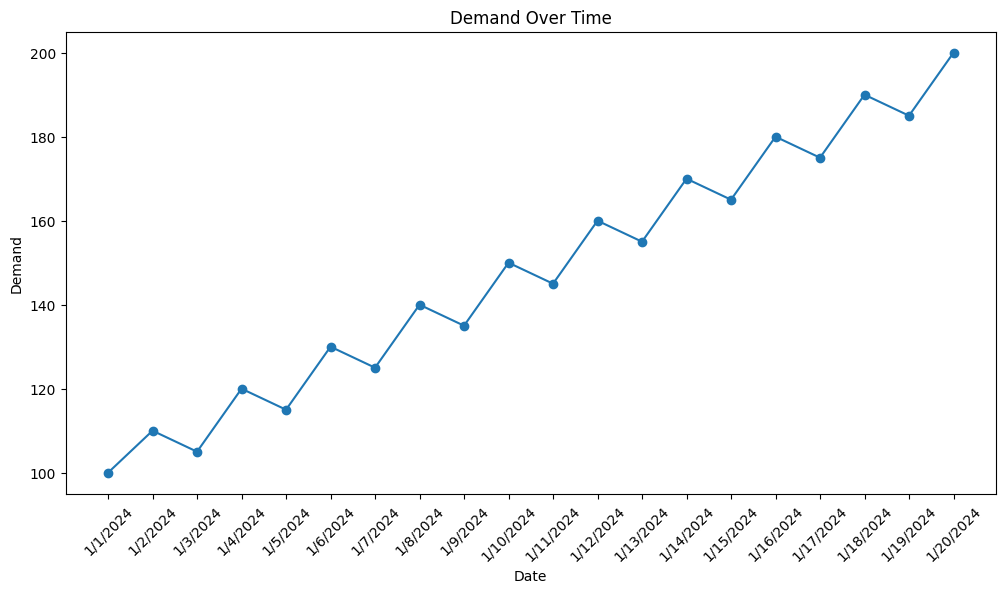

In [5]:
# Line plot for Demand over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Demand'], marker='o', linestyle='-')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.show()

#### Seasonality

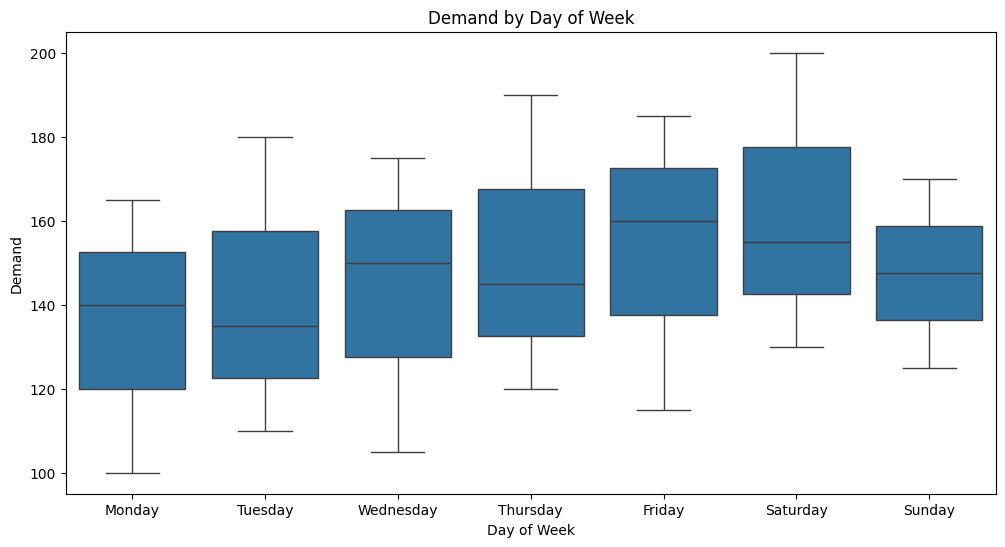

In [6]:
# Boxplot by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Demand', data=df)
plt.title('Demand by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Demand')
plt.show()


In [9]:
df.head()

,Date,Demand,Temperature (Celsius),Rainfall (mm),Day of Week,Holiday
0,1/1/2024,100,20,5,Monday,Yes
1,1/2/2024,110,22,3,Tuesday,No
2,1/3/2024,105,18,8,Wednesday,No
3,1/4/2024,120,19,2,Thursday,No
4,1/5/2024,115,21,4,Friday,No


#### Correlation Matrix

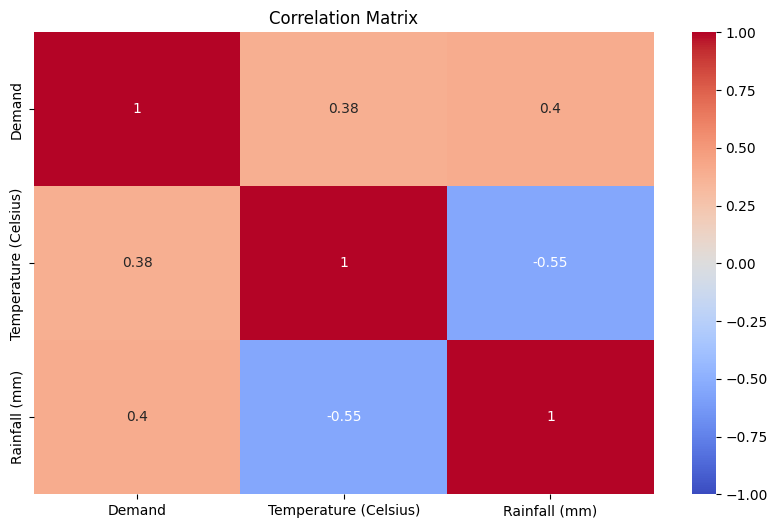

In [10]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
correlation_matrix = df.drop(['Date', 'Day of Week', 'Holiday'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#### Pair Plot

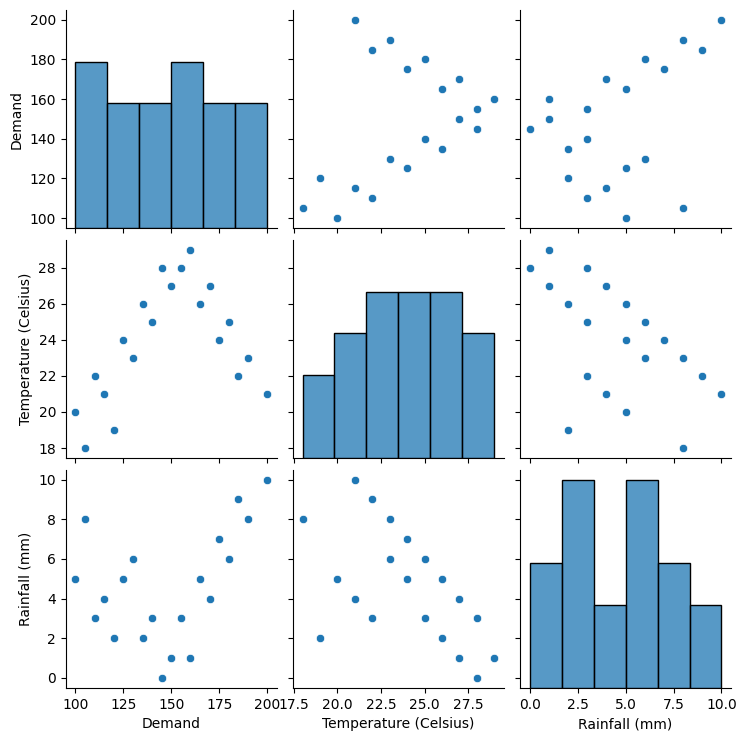

In [11]:
# Pair plot for numerical features
sns.pairplot(df.drop('Date', axis=1))
plt.show()

#### Summary Statistics

In [12]:
print(df.describe())

           Demand  Temperature (Celsius)  Rainfall (mm)
count   20.000000              20.000000       20.00000
mean   147.750000              23.900000        4.60000
std     30.020826               3.160613        2.81724
min    100.000000              18.000000        0.00000
25%    123.750000              21.750000        2.75000
50%    147.500000              24.000000        4.50000
75%    171.250000              26.250000        6.25000
max    200.000000              29.000000       10.00000


### Data Preprocessing

#### Normalization

In [13]:
# Normalization
scaler = MinMaxScaler()
df[['Demand', 
    'Temperature (Celsius)', 
    'Rainfall (mm)']] = scaler.fit_transform(df[['Demand','Temperature (Celsius)', 'Rainfall (mm)']])


#### Feature Engineering

In [14]:
# Extract additional features from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Encode categorical variables (Day of Week and Holiday)
df = pd.get_dummies(df, columns=['Day of Week', 'Holiday'])

# Create interaction features
df['Temp_Rainfall'] = df['Temperature (Celsius)'] * df['Rainfall (mm)']

print(df.head())


        Date  Demand  Temperature (Celsius)  Rainfall (mm)  Day  Month  Year  \
0 2024-01-01    0.00               0.181818            0.5    1      1  2024   
1 2024-01-02    0.10               0.363636            0.3    2      1  2024   
2 2024-01-03    0.05               0.000000            0.8    3      1  2024   
3 2024-01-04    0.20               0.090909            0.2    4      1  2024   
4 2024-01-05    0.15               0.272727            0.4    5      1  2024   

   Day of Week_Friday  Day of Week_Monday  Day of Week_Saturday  \
0               False                True                 False   
1               False               False                 False   
2               False               False                 False   
3               False               False                 False   
4                True               False                 False   

   Day of Week_Sunday  Day of Week_Thursday  Day of Week_Tuesday  \
0               False                 False     

### Time Series Decomposition

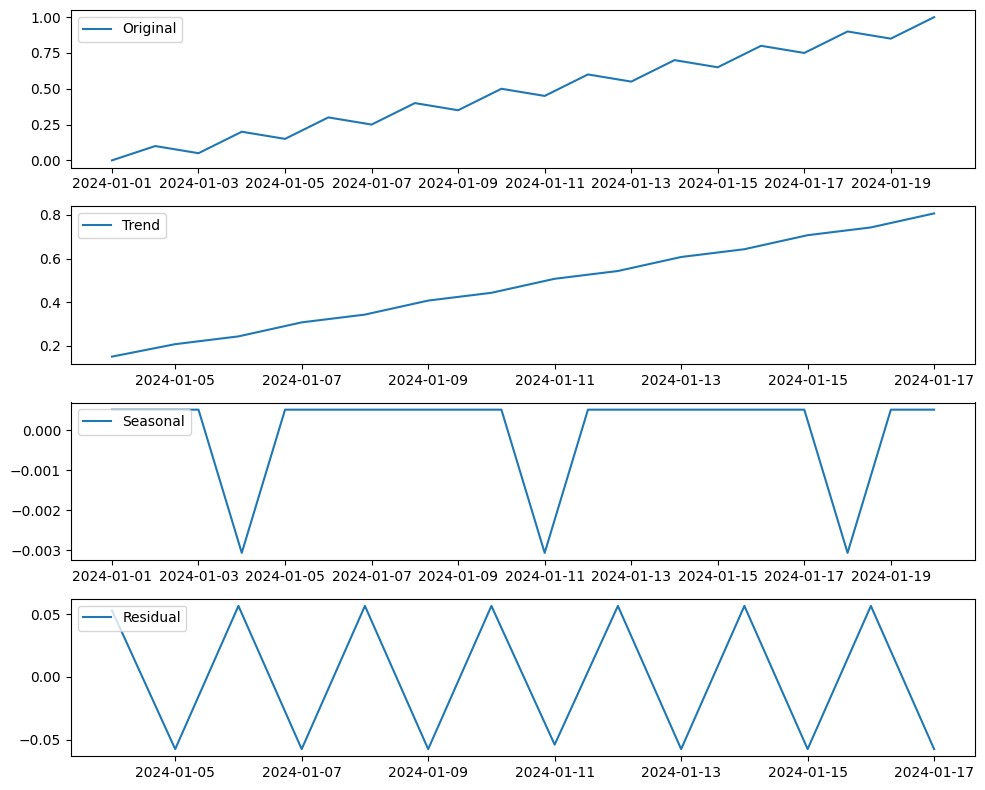

In [15]:
# Setting the date as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Time series decomposition
result = seasonal_decompose(df['Demand'], model='additive')

# Plot decomposition
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Demand'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Model Building

#### Splitting the Data

In [17]:
# Splitting the data into train and test sets
X = df.drop(['Demand'], axis=1)  # Features
y = df['Demand']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression Model

Train MSE: 0.00, Test MSE: 0.02
Train MAE: 0.03, Test MAE: 0.12


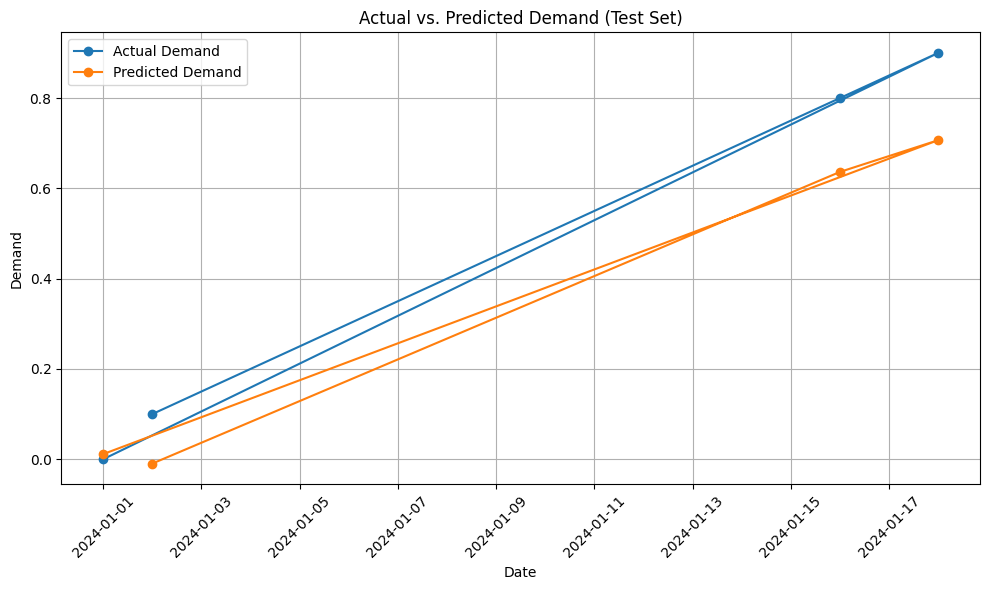

In [18]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")

# Plotting actual vs. predicted demand for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Demand', marker='o')
plt.plot(y_test.index, y_pred_test, label='Predicted Demand', marker='o')
plt.title('Actual vs. Predicted Demand (Test Set)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.02124999999999999


### Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01581031250000001


### Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.010619859283258155


### Support Vector Regression (SVR)

In [22]:
from sklearn.svm import SVR

# Train the model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.16291602478907768


### Neural Networks (MLPRegressor)

In [23]:
from sklearn.neural_network import MLPRegressor

# Train the model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4654.744930798965


### K-Nearest Neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01657500000000001


### XGBoost

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.02028592566503374


### Hyperparameter Tuning

Hyperparameter tuning is essential for optimizing the performance of machine learning models. It involves selecting the best set of hyperparameters for a given algorithm. We'll demonstrate hyperparameter tuning using GridSearchCV from scikit-learn, which performs an exhaustive search over a specified parameter grid.

#### Linear Regression (Ridge and Lasso)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Define the parameter grids
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
elasticnet_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.5, 0.7, 1.0]}

# Initialize the models
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Perform grid search for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train, y_train)
print(f'Best parameters for Ridge: {ridge_grid_search.best_params_}')
best_ridge = ridge_grid_search.best_estimator_

# Perform grid search for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lasso_grid_search.fit(X_train, y_train)
print(f'Best parameters for Lasso: {lasso_grid_search.best_params_}')
best_lasso = lasso_grid_search.best_estimator_

# Perform grid search for Elastic Net
elasticnet_grid_search = GridSearchCV(estimator=elasticnet, param_grid=elasticnet_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
elasticnet_grid_search.fit(X_train, y_train)
print(f'Best parameters for Elastic Net: {elasticnet_grid_search.best_params_}')
best_elasticnet = elasticnet_grid_search.best_estimator_

# Evaluate the models
models = {'Ridge': best_ridge, 'Lasso': best_lasso, 'Elastic Net': best_elasticnet}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} Mean Squared Error: {mse}')


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Ridge: {'alpha': 10.0}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Lasso: {'alpha': 0.1}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.1}
Ridge Mean Squared Error: 0.002993182634357896
Lasso Mean Squared Error: 0.003829415262432172
Elastic Net Mean Squared Error: 0.002508434377779431


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 0.014932500000000005


### Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.018680392858913767


### Support Vector Regression (SVR)

In [29]:
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the model
svr = SVR()

# Perform grid search
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Mean Squared Error: 0.0046223641957328756


### Neural Network (MLPRegressor)

In [30]:
from sklearn.neural_network import MLPRegressor

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the model
mlp = MLPRegressor(max_iter=500, random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Mean Squared Error: 0.1951977420618026


### Decision Tree Regressor (Hyperparameter Tuning)

In [33]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error']
}

# Initialize the model
dt = DecisionTreeRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Extract results
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_score'] = -results['mean_test_score']

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error: 0.007378472222222223


### Comparing OLS, DTR, RF, GB, SVR, Neural Network, and XGBoost

#### Before Hyperparameter Tuning:


| Model | Mean Squared Error | Performance |
| --- | --- | --- |
| **Gradient Boosting** | **0.0108** | **Best** |
| **XGBoosting** | **0.002434** | **Best** |
| Linear Regression | 0.02 | Good |
| Decision Tree | 0.0125 | Better |
| Random Forest | 0.0156 | Better |
| Support Vector Regression | 0.162 | Poor |
| Neural Network | 0.10323 | Poor |
| KNN | 0.10323 | Poor |


Explanation:

Best: Gradient Boosting has the lowest MSE and thus the best performance.
Better: Decision Tree, Random Forest, and XGBoost have relatively low MSE values and perform well but not as well as Gradient Boosting.
Good: Linear Regression and XGBoost (slightly higher MSE than the best-performing models) are good but not as strong as the 'Better' models.
Poor: Support Vector Regression, Neural Network, and K-Nearest Neighbors have the highest MSE values and thus the poorest performance in this dataset.

Summary:

Best: Gradient Boosting (0.0108)
Better: Decision Tree (0.0125), Random Forest (0.0156)
Good: Linear Regression (0.0200), XGBoost (0.0243)
Poor: Support Vector Regression (0.1620), Neural Network (0.1032), K-Nearest Neighbors (0.1032)

#### After Hyperparameter Tuning:

| Model | Mean Squared Error | Performance |
| --- | --- | --- |
| **Linear Regression** | **0.003** | **Best** |
| **Support Vector Regression** | **0.004622** | **Best** |
| Gradient Boosting | 0.0109 | Better |
| Decision Tree | 0.0125 | Better |
| Random Forest | 0.0145 | Better |
| XGBoosting | 0.0208 | Good |
| KNN | 0.01657 | Good |
| Neural Network | 0.133 | Poor |


Comparison:

Linear Regression:

Before Tuning: MSE = 0.0200 (Good)
After Tuning: MSE = 0.0030 (Best)
Improvement: Significant improvement, moving from Good to Best.
Decision Tree:

Before Tuning: MSE = 0.0125 (Better)
After Tuning: MSE = 0.0125 (Better)
Improvement: No change.
Random Forest:

Before Tuning: MSE = 0.0156 (Better)
After Tuning: MSE = 0.0145 (Better)
Improvement: Slight improvement.
Gradient Boosting:

Before Tuning: MSE = 0.0108 (Best)
After Tuning: MSE = 0.0109 (Better)
Change: Slight decrease in performance.
Support Vector Regression:

Before Tuning: MSE = 0.1620 (Poor)
After Tuning: MSE = 0.004622 (Best)
Improvement: Significant improvement, moving from Poor to Best.
Neural Network:

Before Tuning: MSE = 0.1032 (Poor)
After Tuning: MSE = 0.133 (Poor)
Change: Decrease in performance.
KNN:

Before Tuning: MSE = 0.1032 (Poor)
After Tuning: MSE = 0.01657 (Good)
Improvement: Significant improvement, moving from Poor to Good.
XGBoosting:

Before Tuning: MSE = 0.0243 (Good)
After Tuning: MSE = 0.0208 (Good)
Improvement: Slight improvement.